<a href="https://colab.research.google.com/github/leyanetpiedra/class-PDI/blob/main/AF7_Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AF 4- Transformadas geométricas y de Fourier**


*   Nelly Fernanda Torres ramírez 2014788
*   Leyanet Piedra Llanes 2011260

Profesor: Daniel Isaías López Páez

Clase: Procesamiento Digital de Imágenes

### **Análisis y ecualización de histogramas:**


Aquí se realiza el análisis del histograma de la imagen médica original y su posterior ecualización. La ecualización del histograma mejora el contraste de la imagen, permitiendo resaltar detalles poco visibles, como estructuras óseas y tejidos. Se comparan ambos histogramas para observar el impacto visual de esta técnica.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fracture.png to Fracture.png


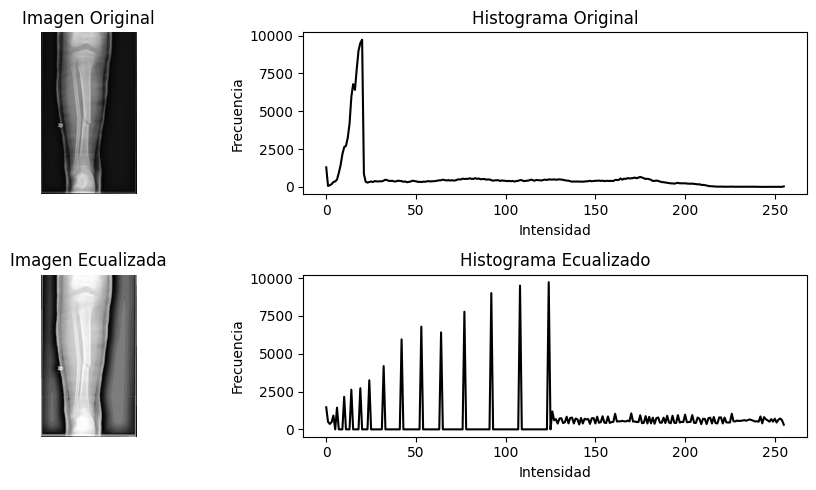

In [14]:
# Obtener el nombre de la imagen subida
imagen_path = list(uploaded.keys())[0]

# Cargar la imagen en escala de grises
imagen = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)

# Aplicar ecualización de histograma
imagen_ecualizada = cv2.equalizeHist(imagen)

# Calcular histogramas antes y después
hist_original = cv2.calcHist([imagen], [0], None, [256], [0,256])
hist_ecualizada = cv2.calcHist([imagen_ecualizada], [0], None, [256], [0,256])

# Mostrar imágenes y histogramas
plt.figure(figsize=(10,5))

# Imagen Original
plt.subplot(2,2,1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

# Histograma Original
plt.subplot(2,2,2)
plt.plot(hist_original, color="black")
plt.title("Histograma Original")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

# Imagen Ecualizada
plt.subplot(2,2,3)
plt.imshow(imagen_ecualizada, cmap="gray")
plt.title("Imagen Ecualizada")
plt.axis("off")

# Histograma Ecualizado
plt.subplot(2,2,4)
plt.plot(hist_ecualizada, color="black")
plt.title("Histograma Ecualizado")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

**Comparación visual antes y después de la ecualización**

En la imagen original se puede observar una distribución muy parecidas de intensidades, con regiones muy claras u oscuras que ocultan detalles anatómicos y no puedes ver con detalle las estrcuturas.

Tras aplicar la ecualización de histograma, la imagen presenta mayor contraste: se intensifican los bordes de estructuras como los huesos y se distinguen mejor los tejidos. Esta mejora facilita la interpretación visual de zonas con densidades similares.



### **Operaciones aritméticas y lógicas:**

Se aplica un filtro de suavizado (desenfoque gaussiano) a la imagen y se resta de la imagen original. Esta operación permite resaltar los bordes y transiciones de intensidad, lo que facilita la localización de estructuras anatómicas importantes

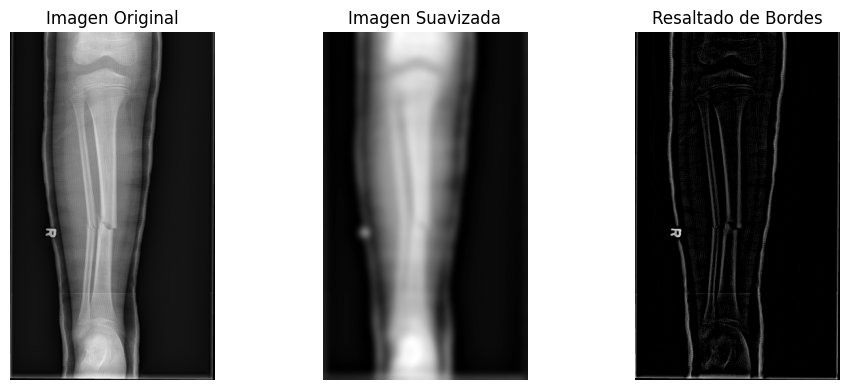

In [ ]:
# Aplicar filtro de desenfoque (suavizado)
imagen_suavizada = cv2.GaussianBlur(imagen, (31, 31), 0)

# Resta entre la imagen original y la suavizada
imagen_bordes = cv2.subtract(imagen, imagen_suavizada)

# Mostrar resultados
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(imagen_suavizada, cmap='gray')
plt.title('Imagen Suavizada')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(imagen_bordes, cmap='gray')
plt.title('Resaltado de Bordes')
plt.axis('off')

plt.tight_layout()
plt.show()


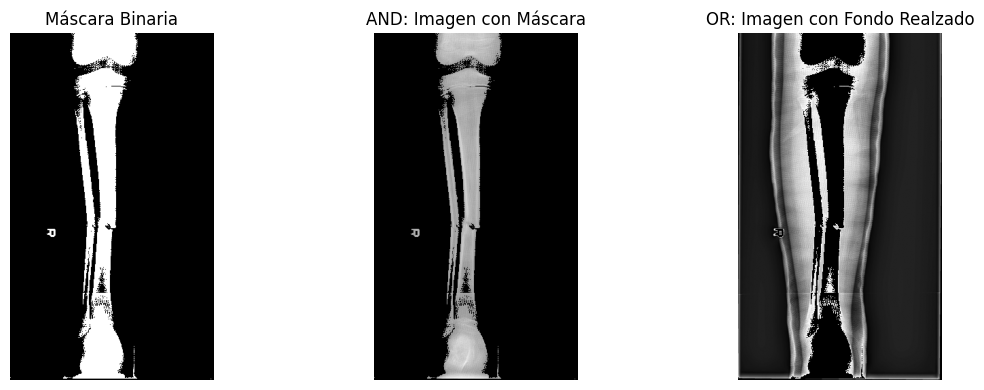

In [ ]:
# Crear una máscara binaria con umbral
_,mascara = cv2.threshold(imagen, 150, 255, cv2.THRESH_BINARY)

# Aplicar operación lógica AND entre la imagen original y la máscara
imagen_and = cv2.bitwise_and(imagen, imagen, mask=mascara)

# Invertimos la máscara y aplicamos OR
mascara_invertida = cv2.bitwise_not(mascara)
imagen_or = cv2.bitwise_or(imagen, imagen, mask=mascara_invertida)

# Mostrar resultados
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(mascara, cmap='gray')
plt.title('Máscara Binaria')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(imagen_and, cmap='gray')
plt.title('AND: Imagen con Máscara')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(imagen_or, cmap='gray')
plt.title('OR: Imagen con Fondo Realzado')
plt.axis('off')

plt.tight_layout()
plt.show()


**Operaciones aritméticas y lógicas**

Primero, se aplicó una resta entre la imagen original y una versión suavizada usando un filtro Gaussiano. Esta técnica busca resaltar los bordes en este caso el hueso que es donde hay cambios grandes de intensidad.

Luego se creó una máscara binaria mediante umbralización. Se aplicaron operaciones lógicas AND y OR etre la imagen y la máscara, permitiendo visualizar o resaltar zonas específicas como tejidos brillantes.


### **Filtros usando máscaras**


**Aplicar filtros pasa-bajo (media, gaussiano) para eliminar ruido.**

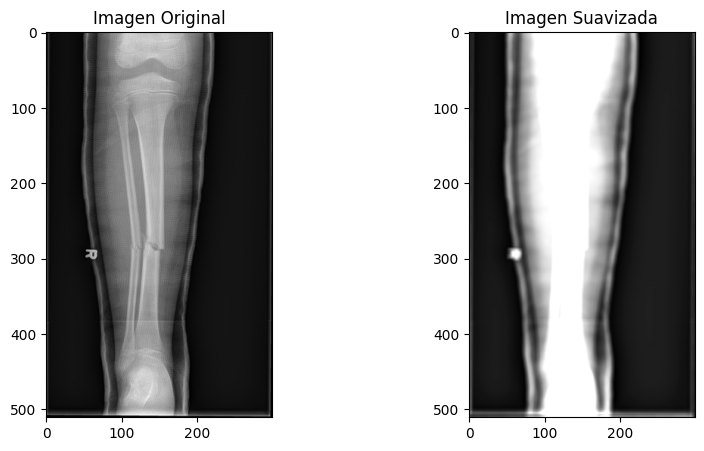

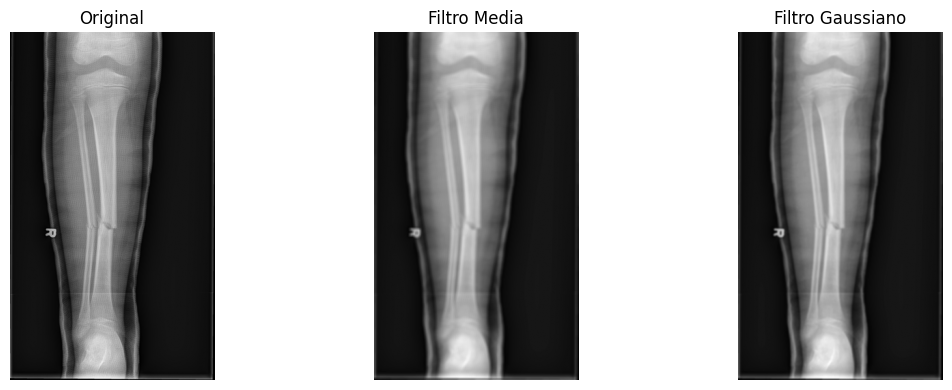

In [ ]:
# Definir el kernel de suavizado (filtro de promedio 5x5)
kernel = np.ones((7,7), np.float32) / 25

# Aplicar el filtro pasa bajo
img_suavizada = cv2.filter2D(imagen, -1, kernel)

# Mostrar la imagen original y la suavizada
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(imagen, cmap='gray'), plt.title('Imagen Original')
plt.subplot(1,2,2), plt.imshow(img_suavizada, cmap='gray'), plt.title('Imagen Suavizada')
plt.show()

# Filtros pasa-bajo
filtro_media = cv2.blur(imagen, (5, 5))
filtro_gauss = cv2.GaussianBlur(imagen, (5, 5), 0)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(filtro_media, cmap='gray')
plt.title("Filtro Media")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(filtro_gauss, cmap='gray')
plt.title("Filtro Gaussiano")
plt.axis("off")

plt.tight_layout()
plt.show()


**Aplicar filtros pasa-alto (Laplaciano, Sobel) para detección de bordes.**

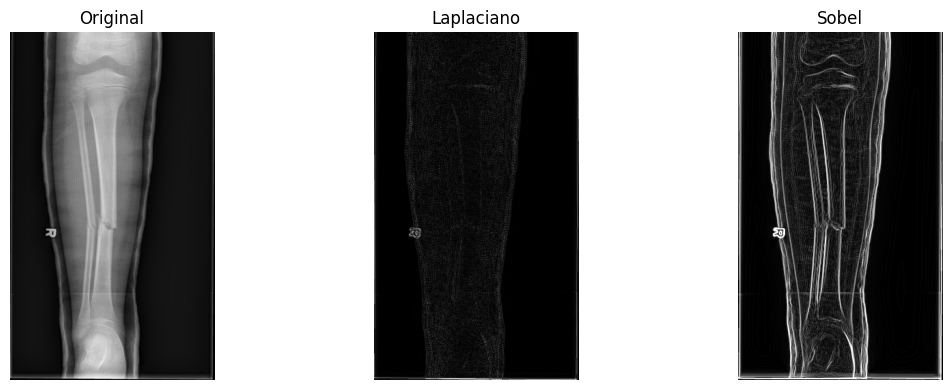

In [ ]:
# Filtros pasa-alto (Laplaciano y Sobel)
laplaciano = cv2.Laplacian(imagen, cv2.CV_64F)
laplaciano = cv2.convertScaleAbs(laplaciano)

sobelx = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=3)
sobel_total = cv2.magnitude(sobelx, sobely)
sobel_total = cv2.convertScaleAbs(sobel_total)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(laplaciano, cmap='gray')
plt.title("Laplaciano")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(sobel_total, cmap='gray')
plt.title("Sobel")
plt.axis("off")

plt.tight_layout()
plt.show()


### **Segmentación por umbral**

Se utiliza un umbral adaptativo y fijo para separar regiones específicas de la imagen. Además, se incluye un control deslizante (slider interactivo) que permite al usuario ajustar manualmente el valor del umbral y visualizar los cambios en tiempo real. Esta técnica es útil en tareas de segmentación clínica.

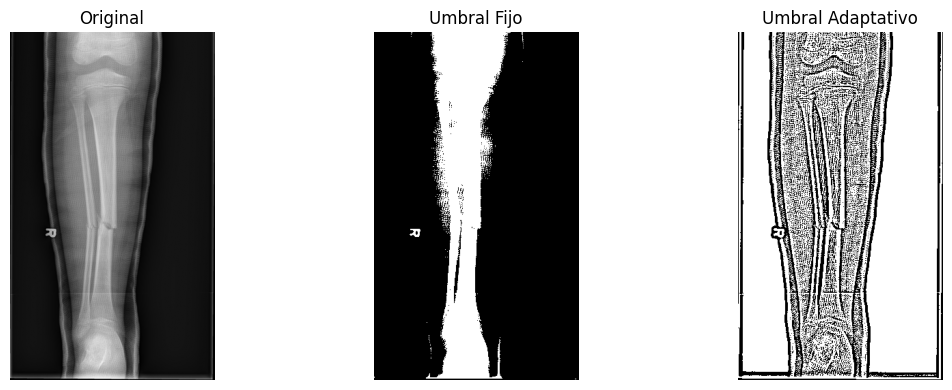

In [ ]:
# Segmentación con umbral fijo y adaptativo
_, umbral_fijo = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)
umbral_adaptativo = cv2.adaptiveThreshold(imagen, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(umbral_fijo, cmap='gray')
plt.title("Umbral Fijo")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(umbral_adaptativo, cmap='gray')
plt.title("Umbral Adaptativo")
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Control deslizante  para ajustar umbral
from ipywidgets import interact, IntSlider
from IPython.display import display

def ajustar_umbral(valor):
    _, img_umbral = cv2.threshold(imagen, valor, 255, cv2.THRESH_BINARY)
    plt.figure(figsize=(6,4))
    plt.imshow(img_umbral, cmap='gray')
    plt.title(f"Umbral Fijo: {valor}")
    plt.axis("off")
    plt.show()

# Mostrar slider interactivo
interact(ajustar_umbral, valor=IntSlider(min=0, max=255, step=1, value=127))


###**Transformada de Fourier**

Se calcula la Transformada de Fourier de la imagen médica para analizar su contenido en el dominio de la frecuencia. Posteriormente, se aplica un filtro de paso bajo en la frecuencia (eliminando componentes de alta frecuencia) para obtener una imagen suavizada al reconstruirla. Esto demuestra cómo las frecuencias afectan la estructura visual y cómo se pueden manipular para fines médicos específicos.

**Transformada de Fourier + Filtro de frecuencia**

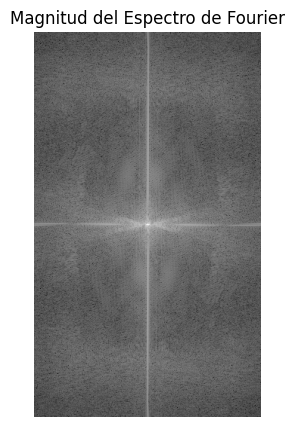

In [ ]:
# Transformada de Fourier
f = np.fft.fft2(imagen)
fshift = np.fft.fftshift(f)  # Centrar el espectro
magnitud = 20 * np.log(np.abs(fshift) + 1)  # Evitar log(0)

# Mostrar la magnitud del espectro de Fourier
plt.figure(figsize=(6,5))
plt.imshow(magnitud, cmap='gray')
plt.title('Magnitud del Espectro de Fourier')
plt.axis('off')
plt.show()


**Filtro en el dominio de la frecuencia (eliminar alta frecuencia)**

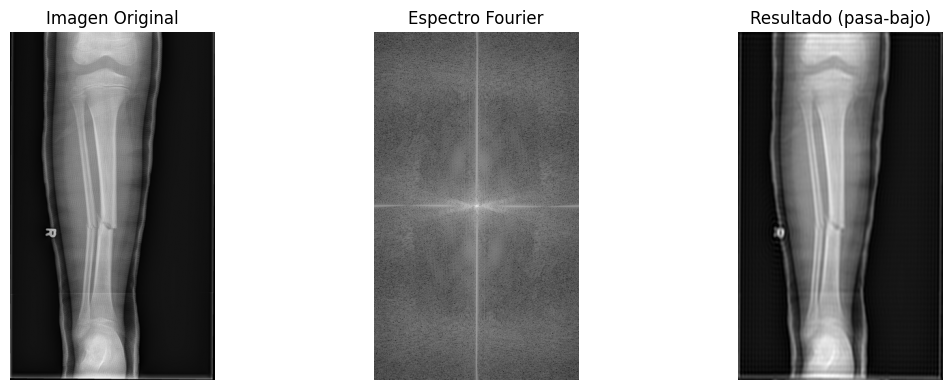

In [ ]:
# Crear una máscara de filtro pasa-bajo (manteniendo bajas frecuencias)
rows, cols = imagen.shape
crow, ccol = rows // 2 , cols // 2
radio = 60

# Crear máscara circular
mascara = np.zeros_like(imagen)
cv2.circle(mascara, (ccol, crow), radio, 1, -1)

# Aplicar la máscara al espectro
fshift_filtrado = fshift * mascara

# Transformada inversa para volver al dominio espacial
f_ishift = np.fft.ifftshift(fshift_filtrado)
imagen_filtrada = np.fft.ifft2(f_ishift)
imagen_filtrada = np.abs(imagen_filtrada)

# Mostrar resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitud, cmap='gray')
plt.title('Espectro Fourier')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(imagen_filtrada, cmap='gray')
plt.title('Resultado (pasa-bajo)')
plt.axis('off')

plt.tight_layout()
plt.show()
